In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Number 5
#Newton
def f(x):
    return np.exp(6*x)+3*((np.log(2))**2)*np.exp(2*x)-(np.log(8)*np.exp(4*x))-(np.log(2)**3)

In [3]:
def fp(x):
    return (6*np.exp(6*x)+6*np.exp(2*x)*(np.log(2)**2)-(4*np.exp(4*x)*np.log(8)))

In [4]:
x = -.5
MAXITS = 30
tol = 1e-5
k = 0
err = 1
unn = []

while err > tol and k < MAXITS:
    eta = (f(x)/fp(x))
    x = x - eta
    err = np.fabs(eta)
    unn.append(err)
    k +=1
    
print(x)
print(err)
print(k)

-0.18327403783695997
8.785130929033892e-06
23


In [5]:
#Bisection
def g(x):
    return np.exp(6*x)+3*((np.log(2))**2)*np.exp(2*x)-(np.log(8)*np.exp(4*x))-(np.log(2)**3)

In [6]:
bi = []
def bisect(a, b, func, MAXITS = 100, tol = 1e-5):
    # ******************************************************************************
    # Implement the bisection algorithm for locating the root of a function
    #
    # Arguments:
    # a = left endpoint
    # b = right endpoint (assuming an intelligent user so we will not test if b > a)
    # MAXITS = maximum number of iterations before stopping, default = 100
    # tol = tolerance, when is error < tol? default = 1e-8
    # ******************************************************************************
    
    # Prime the algorithm with an estimate of the root
    # Assume and intelligent use who inputs b > a
    error = (b - a)/2
    c = a + error # Safe method for computing average
    nits = 1 # Count this iteration
    
    
    # Start the while loop
    while np.fabs(error) > tol and nits < MAXITS:
    
        # Check the conditions using the intermediate value theorem, remember to use np.sign
        # Redifine the interval, is a = c or is b = c?
        # Assign the new c
        if (np.sign(g(a))*np.sign(g(c))) < 0:
            b = c
        else:
            a = c
        error = (b-a)/2# Use the same error that you chose from above
        bi.append(error)
        c = a + error# Remember to redefine c
        nits += 1
        
    return c, error, nits

In [7]:
a = -1; b = 0;
c, err, n = bisect(a,b,g);
print('Root = {} in {:d} iterations.'.format(c,n))

Root = -0.18326568603515625 in 17 iterations.


In [8]:
#Newtons (Optimized)
def h(x):
    return np.exp(6*x)+3*((np.log(2))**2)*np.exp(2*x)-(np.log(8)*np.exp(4*x))-(np.log(2)**3)

In [9]:
def hp(x):
    return (6*np.exp(6*x)+6*np.exp(2*x)*(np.log(2)**2)-(4*np.exp(4*x)*np.log(8)))

In [10]:
x = -.5
m = 2
MAXITS = 30
tol = 1e-5
k = 0
err = 1
on = []

while err > tol and k < MAXITS:
    eta = m*(h(x)/hp(x))
    x = x - eta
    err = np.fabs(eta)
    on.append(err)
    k +=1
    
print(x)
print(err)
print(k)

-0.18325982679748454
6.0760686402568525e-06
9


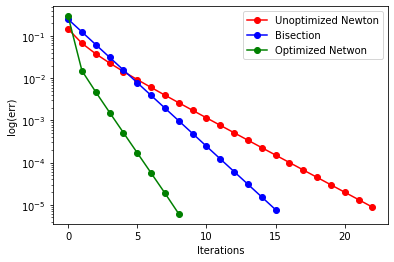

In [11]:
plt.semilogy(range(0,len(unn)),unn,'ro-',range(0,len(bi)),bi,'bo-',range(0,len(on)),on,'go-')
plt.xlabel('Iterations')
plt.ylabel('log(err)')
plt.legend(['Unoptimized Newton', 'Bisection', 'Optimized Netwon'])